# SHAP Explainability
Now we want to explain the decisions of the model, we kind of understood which features the model deemed important before, but now for more detail
 
 ---

 ## Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

### Get Data and Model

In [16]:
def train_test_from_raw_data(dataset):
    dataset.columns = [col.replace(".",'_') for col in dataset.columns]
    dataset = dataset.drop('fnlwgt', axis=1)
    dataset.replace('?', np.nan, inplace=True)
    
    dataset.dropna(inplace=True)
    
    features = dataset.drop('income', axis=1)
    target = dataset['income']
    
    features = pd.get_dummies(features)
    target = target.map({
        '<=50K': 0,
        '>50K': 1
    })
    
    return train_test_split(features, target, test_size = 0.2, stratify = target)

dataset = pd.read_csv("../data/adult_raw.csv")

x_train, x_test, y_train, y_test = train_test_from_raw_data(dataset)

model = xgb.XGBClassifier()
model.fit(x_train, y_train)



,objective,'binary:logistic'
,use_label_encoder,None
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Plot feature Importance
This is just to remember what XGB told us were important features

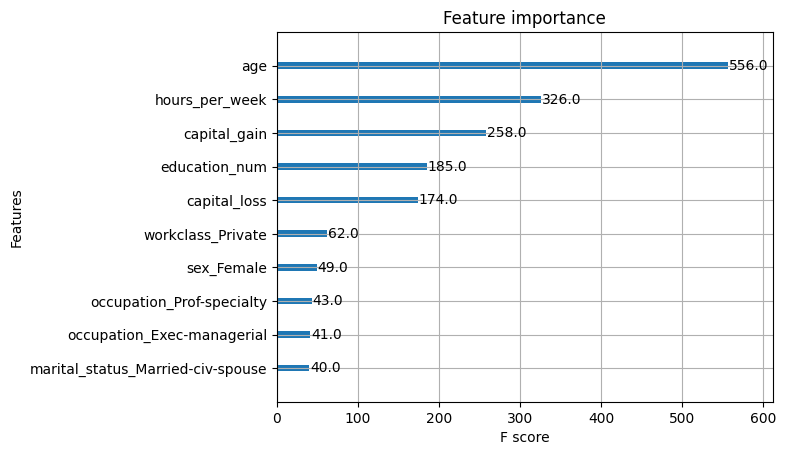

In [17]:
xgb.plot_importance(model, max_num_features= 10)
plt.show()

### Get Explainer and SHAP values

In [18]:
explainer = shap.TreeExplainer(model=model)

shap_v = explainer.shap_values(x_test)

### SHAP Importance of features
This plot will show the average impact that the feature has made on the predictions

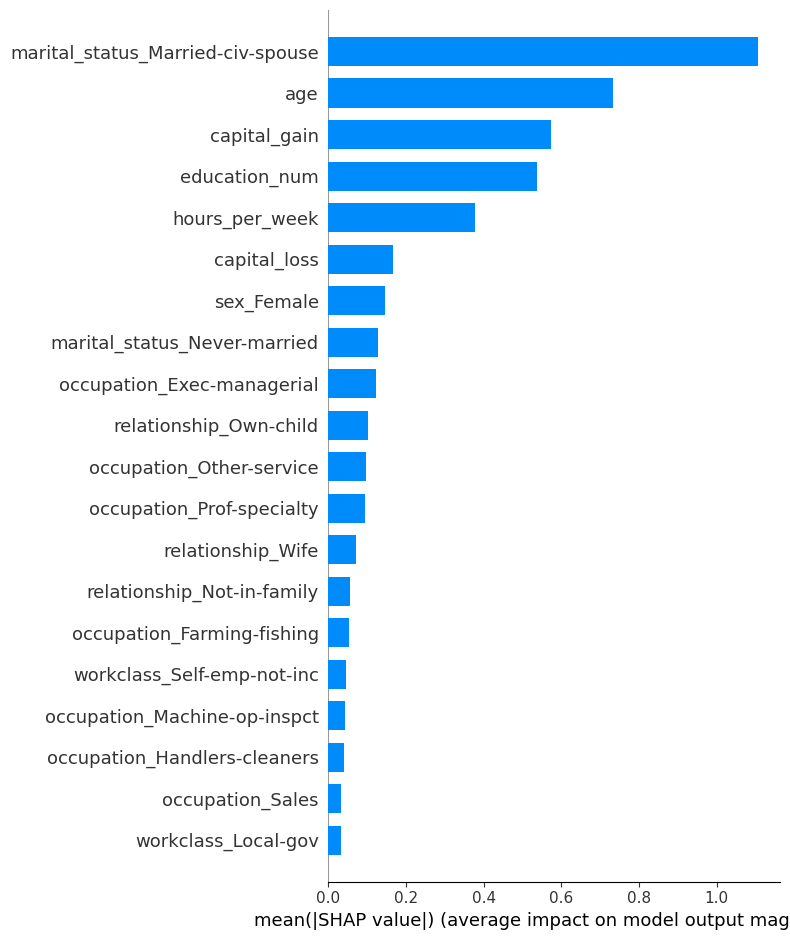

In [19]:
shap.summary_plot(shap_v, x_test, plot_type= 'bar')

### Features with their Effects on Model Output
This plot will show the features, ranked from highest impact to lowest impact, and it will show the affect the feature had on every test case.

If the colour is **red**, that means that it was a **large feature value**.
If it is **blue**, then it is a **low feature value**.

If the dot is on the **right**, that means it had a **positive impact on the prediction**.
If it is on the **left**, then a **negative impact on the prediction**.

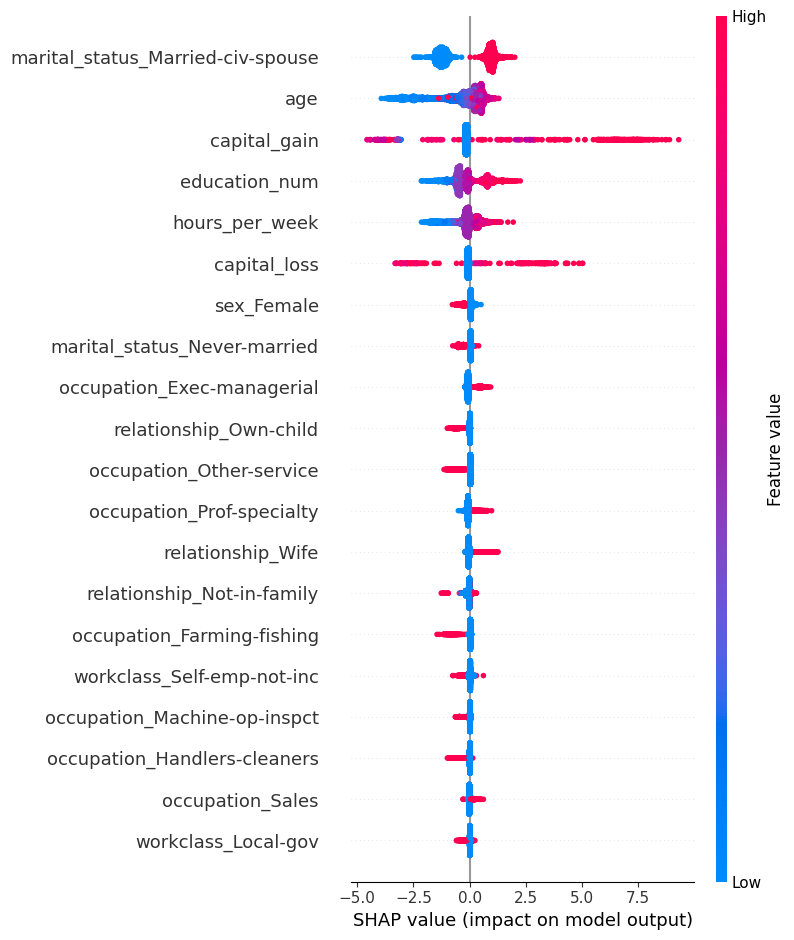

In [20]:
shap.summary_plot(shap_v, x_test)

# Conclusions

## Difference in Importance
Interestingly enough, even though there are similarities in how SHAP and XGB rank the importance of certain features, there are also big differences.

The most obvious difference would be how SHAP importance ranks the info of a person being married as the most important, while XGB does not even have this feature in the top 5 most important ones.

This informs us the even though someone being married might not have a big role in the structure of the tree itself, it played a huge role when it came to predicting whether someone makes <=50K

---

## Features Impact on Output
Now that we have the SHAP plot, we have a clearer idea of how these features actually affect the output of the model, such as:

- If someone is married, it increases the likelihood of making >50K
- As you get older, the higher the likelihood that you make >50K
- While a high capital gain increases your chance of making >50K, sometimes a high value decreases your odds